<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/Tensorflow_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#나만의 이미지 분석 모델을 만들기 위해 이미지를 다운 받고 이를 압축 해제하는 부분
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [6]:
# 해당 이미지들의 경로를 path에 담는 코드
path = glob.glob('./notMNIST_small/*/*.png')
# 경로에 위치한 이미지들을 random하게 셔플하는 역할
path = np.random.permutation(path)
# 셔플한 이미지들을 독립변수와 종속변수에 담는 코드
독립 = np.array([plt.imread(path[i])for i in range(len(path))])
종속 = np.array([path[i].split('/')[-2] for i in range(len(path))])

In [7]:
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [10]:
종속[1]

'D'

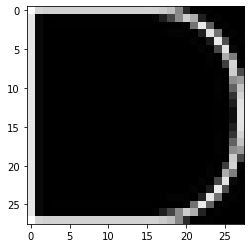

In [11]:
plt.imshow(독립[1],cmap='gray')

In [12]:
# convolution 연산을 위해 reshape 필요
독립 = 독립.reshape(18724, 28, 28, 1)
# 원핫인코딩 실시
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [14]:
# 모델을 생성하는 과정
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

# 이미지를 표 데이터로 변환
H = tf.keras.layers.Flatten()(H)
# 히든 레이어를 사용
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense( 84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [15]:
# 모델을 학습
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 10s 15ms/step - loss: 0.8770 - accuracy: 0.7423
Epoch 2/10
586/586 [==============================] - 9s 15ms/step - loss: 0.3354 - accuracy: 0.8995
Epoch 3/10
586/586 [==============================] - 9s 15ms/step - loss: 0.2570 - accuracy: 0.9220
Epoch 4/10
586/586 [==============================] - 9s 15ms/step - loss: 0.2147 - accuracy: 0.9357
Epoch 5/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1913 - accuracy: 0.9392
Epoch 6/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1641 - accuracy: 0.9488
Epoch 7/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1399 - accuracy: 0.9573
Epoch 8/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1280 - accuracy: 0.9585
Epoch 9/10
586/586 [==============================] - 9s 15ms/step - loss: 0.1126 - accuracy: 0.9641
Epoch 10/10
586/586 [==============================] - 9s 15ms/step - loss: 0.0883 - accur

In [16]:
print(종속[:5])

   A  B  C  D  E  F  G  H  I  J
0  0  0  0  0  0  0  0  0  1  0
1  0  0  0  1  0  0  0  0  0  0
2  0  0  0  0  0  1  0  0  0  0
3  0  0  1  0  0  0  0  0  0  0
4  0  0  0  0  0  1  0  0  0  0


In [17]:
pred = model.predict(독립[:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.00,0.00
1,0.0,0.0,0.0,0.96,0.0,0.0,0.0,0.0,0.03,0.01
2,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.00,0.00
3,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.00,0.00


In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               3084